In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Funções Axiliares

In [2]:
def sintomasComorbidades(base, atributos):
    possui = []
    naoPossui = []
    
    for atributo in atributos:
        valores = base[atributo].value_counts()
        total = valores.sum()
        naoPossui.append((valores[0]) / total)
        possui.append((valores[1]) / total) 
    
    mapa = {'naopossui':naoPossui, 'possui':possui}
    return mapa

In [3]:
def gerarGraficoBarrasDuplas(width, termos, vetor_1, vetor_2, label_vetor_1, label_vetor_2, label_x, label_y):
    fig, ax = plt.subplots()
    ind = np.arange(len(termos))
    plt.bar(ind, vetor_1, width, color = 'blue', label = label_vetor_1)
    plt.bar(ind + width, vetor_2, width, color = 'red', label = label_vetor_2)

    plt.xlabel(label_x)
    plt.ylabel(label_y)

    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

    plt.xticks(rotation=45)
    location = ind+width/2
    labels= termos
    plt.xticks(location, labels)
    plt.legend()

    plt.show()
    #fig = plt.gcf()
    #fig.savefig('comparativo_casos.png', format='png')

In [17]:
def gerarGraficoBarrasTriplas(width, termos, vetor_1, vetor_2, vetor_3, label_vetor_1, 
                             label_vetor_2, label_vetor_3, label_x, label_y):
    
    plt.rcParams["figure.figsize"] = (10,5.5)
    fig, ax = plt.subplots()
    
    barra1 = np.arange(len(termos))
    barra2 = [x + width for x in barra1]
    barra3 = [x + width for x in barra2]
    
    plt.bar(barra1, vetor_1, width, color = 'blue', label = label_vetor_1)
    plt.bar(barra2, vetor_2, width, color = 'red', label = label_vetor_2)
    plt.bar(barra3, vetor_3, width, color = 'orange', label = label_vetor_3)

    plt.xlabel(label_x)
    plt.ylabel(label_y)

    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

    plt.xticks(rotation=45)
    location = barra1+width/2
    labels= termos
    plt.xticks(location, labels)
    plt.legend()
    
    plt.show()

### Visualizando os Dados

In [5]:
# Carregando o Dataset
url = 'Vacinas/OC/oc-vacina-6040-sp.xlsx'
alvo = 'evolucaoCaso'

baseObitoCurado = pd.read_excel(url)

In [6]:
# Selecionando os Atributos

atributosSelecionados = ['faixaetaria', 'dispneia', 'qntVacinas', 'dorDeGarganta', 
                         'coriza', 'diabetes', 'dorDeCabeca', 'cardiaca', 'evolucaoCaso']

baseObitoCurado = baseObitoCurado.loc[:, atributosSelecionados]

In [18]:
baseObitoCurado

,faixaetaria,dispneia,qntVacinas,dorDeGarganta,coriza,diabetes,dorDeCabeca,cardiaca,evolucaoCaso
0,6,1,0,0,0,1,0,0,0
1,5,0,2,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5707,3,0,1,1,1,0,1,0,1
5708,2,0,2,0,0,0,0,0,1
5709,3,0,2,0,1,0,1,0,1
5710,5,0,1,1,0,0,0,0,1


### Sintomas e Comorbidades (Óbito)

In [7]:
# Filtrando apenas os óbitos
filtro = baseObitoCurado['evolucaoCaso'] == 0
baseObito = baseObitoCurado[filtro]
baseObito['evolucaoCaso'].value_counts()

atributos = ['dispneia', 'dorDeGarganta', 'coriza', 'diabetes', 'dorDeCabeca', 'cardiaca']
valoresObito = sintomasComorbidades(baseObito, atributos)
#valoresObito

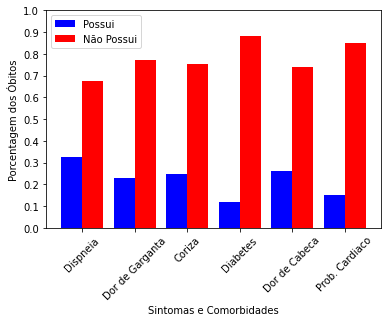

In [8]:
# Gerando o Gráfico
termos = ['Dispneia', 'Dor de Garganta', 'Coriza', 'Diabetes', 'Dor de Cabeca', 'Prob. Cardiaco']
gerarGraficoBarrasDuplas(0.4, termos, valoresObito['possui'], valoresObito['naopossui'], 
                         'Possui', 'Não Possui', 'Sintomas e Comorbidades', 
                         'Porcentagem dos Óbitos')

### Sintomas e Comorbidades (Curado)

In [10]:
# Filtrando apenas os óbitos
filtro = baseObitoCurado['evolucaoCaso'] == 1
baseCurado = baseObitoCurado[filtro]
baseCurado['evolucaoCaso'].value_counts()

atributos = ['dispneia', 'dorDeGarganta', 'coriza', 'diabetes', 'dorDeCabeca', 'cardiaca']
valoresCurado = sintomasComorbidades(baseCurado, atributos)
#valoresObito

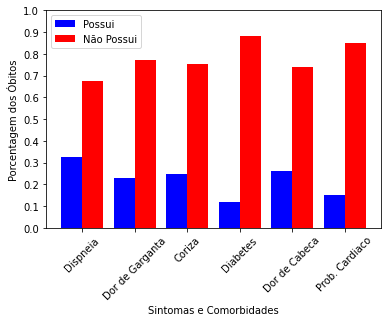

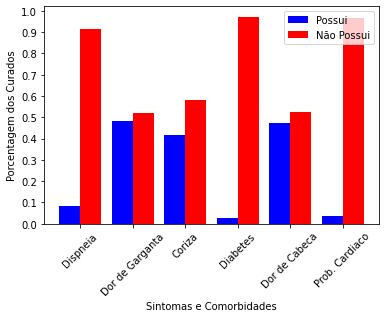

In [11]:
termos = ['Dispneia', 'Dor de Garganta', 'Coriza', 'Diabetes', 'Dor de Cabeca', 'Prob. Cardiaco']

gerarGraficoBarrasDuplas(0.4, termos, valoresObito['possui'], valoresObito['naopossui'], 
                         'Possui', 'Não Possui', 'Sintomas e Comorbidades', 
                         'Porcentagem dos Óbitos')

gerarGraficoBarrasDuplas(0.4, termos, valoresCurado['possui'], valoresCurado['naopossui'], 
                         'Possui', 'Não Possui', 'Sintomas e Comorbidades', 
                         'Porcentagem dos Curados')

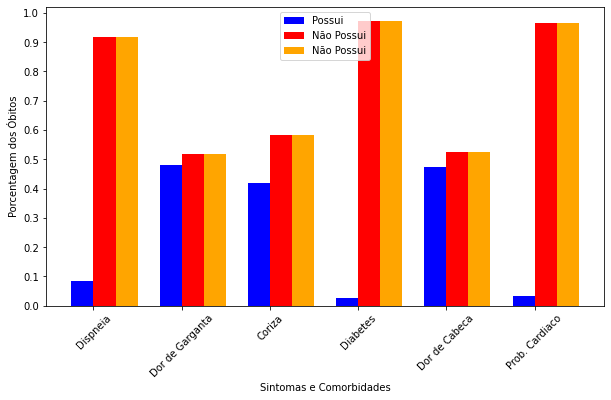

In [18]:
# Visualização por faixaetaria
gerarGraficoBarrasTriplas(0.25, termos, valoresCurado['possui'], valoresCurado['naopossui'], valoresCurado['naopossui'],
                         'Possui', 'Não Possui', 'Não Possui', 'Sintomas e Comorbidades', 
                         'Porcentagem dos Óbitos')

In [19]:
# Quantidade de Vacinas - Óbito




In [20]:
# Mortalidade por faixa-etaria


In [ ]:
# Gráfico - Barra Única
# https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351